## Importación de librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de datos

In [2]:
df_houses = pd.read_csv('house_prices.csv')
df_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('La información del dataset es la siguiente:')
print(df_houses.keys())

La información del dataset es la siguiente:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'G

In [4]:
print('La cantidad de datos que hay es la siguiente :')
print(df_houses.shape)

La cantidad de datos que hay es la siguiente :
(1460, 81)


In [5]:
print('Los nombres de las columnas son :')
for i in range(df_houses.shape[1]):
    print(df_houses.columns[i])

Los nombres de las columnas son :
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [6]:
# El significado de cada una de las variables es
caracteristicas = open('house_prices.txt')
print('La información de las variables es: ')
print(caracteristicas.read())

La información de las variables es: 
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior coverin

In [7]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Estudio del conjunto de datos

In [8]:
variables_numericas = df_houses.select_dtypes(include=[np.number])
corr = variables_numericas.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


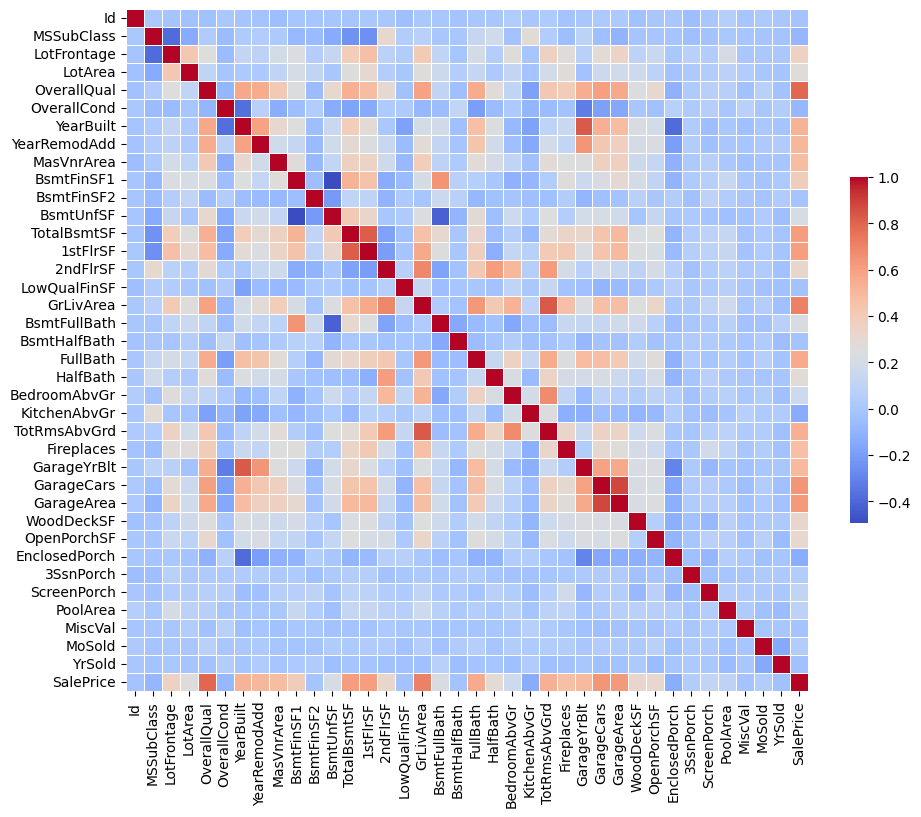

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Regresión lineal simple

Según la paleta de colores elegida nos interesan, para predecir Saleprice:
- Las rojas más intensas, que tienen una relación directa
- Las azules más intensas, las cuales tienen una relación indirecta

Vamos a probar con OverallQual

In [10]:
#Seleccionamos la variable predictora
X = df_houses[['OverallQual']]
#Seleccionamos la variable predicha
y = df_houses['SalePrice']

In [11]:
X

,OverallQual
0,7
1,6
2,7
3,7
4,8
...,...
1455,6
1456,6
1457,7
1458,5


In [12]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Visualización del conjunto de datos

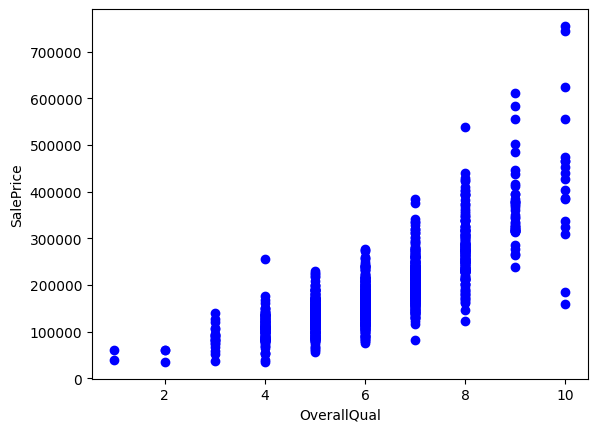

In [13]:
plt.scatter(X, y, color="blue")
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

## División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [14]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [15]:
X_train.shape

(876, 1)

In [16]:
X_test.shape

(292, 1)

In [17]:
X_val.shape

(292, 1)

## Creación del modelo de Regresión

In [18]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

## Predicción del conjunto de datos de validación

In [19]:
y_pred = lr.predict(X_val)

## Validacion de resultados

In [20]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
699,196000,221120.778514,25120.778514
1242,170000,221120.778514,51120.778514
707,254000,266084.108214,12084.108214
788,107900,86230.789414,21669.210586
800,200000,176157.448814,23842.551186


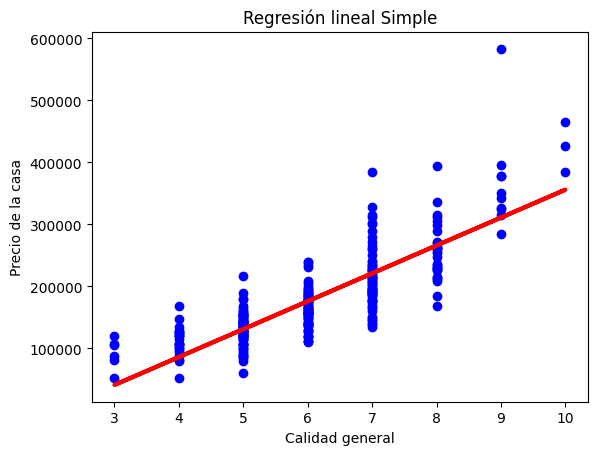

In [21]:
plt.scatter(X_val, y_val, color='blue')
plt.plot(X_val, y_pred, color='red', linewidth=3)
plt.title('Regresión lineal Simple')
plt.xlabel('Calidad general')
plt.ylabel('Precio de la casa')
plt.show()

In [22]:
print('progresión del precio =', lr.coef_[0], 'OverallQual +', lr.intercept_)

progresión del precio = 44963.329699961614 OverallQual + -93622.52938606511


## Metricas

In [23]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 42062.66
Coeficiente de determinación: 0.67


## Predicción de datos futuros

In [24]:
y_pred = lr.predict(X_test)

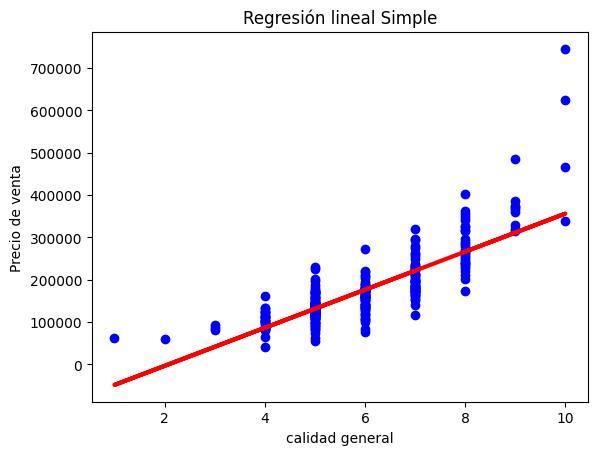

In [25]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresión lineal Simple')
plt.xlabel('calidad general')
plt.ylabel('Precio de venta')
plt.show()

In [26]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 49162.80
Coeficiente de determinación: 0.66


Se han probado otras variables como KitchenAbvGr, pero la variable que mejor ha precedido el precio de una casa ha sido Overallqual, es decir, la calidad general de la vivienda.

# Regresión múltiple

Vamos a probar con OverallQual regresión múltple con 'OverallQual' y 'KitchenAbvGr'

In [27]:
#Seleccionamos la variable predictora
X = df_houses[['OverallQual','KitchenAbvGr']]
#Seleccionamos la variable predicha
y = df_houses['SalePrice']

In [28]:
X

,OverallQual,KitchenAbvGr
0,7,1
1,6,1
2,7,1
3,7,1
4,8,1
...,...,...
1455,6,1
1456,6,1
1457,7,1
1458,5,1


In [29]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## División de datos (conjuntos de entrenamiento y de prueba)
Dividimos los datos en entrenamiento y prueba mediante la instrucción train_test_split. Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo

In [30]:
# Dividimos los datos de en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [31]:
X_train.shape

(876, 2)

In [32]:
X_test.shape

(292, 2)

In [33]:
X_val.shape

(292, 2)

## Creación del modelo de Regresión

In [34]:
# Creación del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

## Predicción del conjunto de datos de validación

In [35]:
y_pred = lr.predict(X_val)

## Validacion de resultados

In [36]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Diferencia'] = abs(df_res['Valor Predicho']-df_res['Valor Real'] )
df_res.head()

,Valor Real,Valor Predicho,Diferencia
699,196000,221041.233330,25041.233330
1242,170000,221041.233330,51041.233330
707,254000,266106.979984,12106.979984
788,107900,85843.993369,22056.006631
800,200000,175975.486676,24024.513324


In [37]:
print('progresión del precio =', lr.coef_[0], 'OverallQual +',lr.coef_[1], 'KitchenAbvGr +', lr.intercept_)

progresión del precio = 45065.74665382264 OverallQual + 3383.026200733161 KitchenAbvGr + -97802.01944735789


## Metricas

In [38]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))

Raiz error cuadrático medio: 42067.68
Coeficiente de determinación: 0.67


## Predicción de datos futuros

In [39]:
y_pred = lr.predict(X_test)

In [40]:
print('Raiz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Raiz error cuadrático medio: 49145.00
Coeficiente de determinación: 0.66


El modelo de regresión múltiple tiene unos coeficientes parecidos al de regresión lineal, por lo que no valdría demasiado la pena.